In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [5]:
rand_state=1000

In [6]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_code\DataSet.txt') 

In [7]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_code\Thesis_Data.csv', index=None)

In [8]:
df = pd.read_table('Thesis_Data.csv')

In [10]:
df.head()

,Skill_set,Gaze_point_X,Gaze_point_Y,Gaze_event_duration
0,Skilled,1284,-67,305
1,Skilled,1288,-67,305
2,Skilled,1284,-71,305
3,Skilled,1286,-70,305
4,Skilled,1285,-73,305


In [11]:
df.nunique()

Skill_set                 2
Gaze_point_X           1825
Gaze_point_Y           1802
Gaze_event_duration     504
dtype: int64

In [12]:
df.info

<bound method DataFrame.info of        Skill_set  Gaze_point_X  Gaze_point_Y  Gaze_event_duration
0        Skilled          1284           -67                  305
1        Skilled          1288           -67                  305
2        Skilled          1284           -71                  305
3        Skilled          1286           -70                  305
4        Skilled          1285           -73                  305
...          ...           ...           ...                  ...
447422    Novice           486           367                  100
447423    Novice           479           361                  100
447424    Novice           477           365                  100
447425    Novice           484           363                  100
447426    Novice           482           358                  100

[447427 rows x 4 columns]>

In [13]:
df.isna().sum()

Skill_set              0
Gaze_point_X           0
Gaze_point_Y           0
Gaze_event_duration    0
dtype: int64

In [14]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration
count,447427.000000,447427.000000,447427.000000
mean,671.849082,382.082889,666.896803
std,184.931150,177.935986,1129.274190
min,-272.000000,-154.000000,9.000000
25%,580.000000,252.000000,183.000000
50%,684.000000,376.000000,349.000000
75%,779.000000,487.000000,716.000000
max,1639.000000,1688.000000,15475.000000


<Figure size 600x400 with 0 Axes>

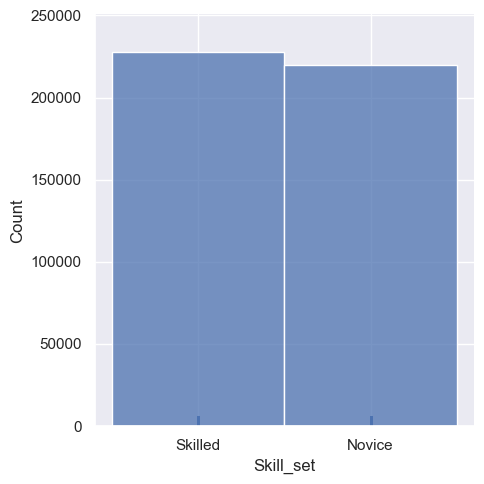

In [17]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_set'], rug=True)
plt.show()

In [19]:
ordinal_categoricals = ['Skill_set']

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
enc = OrdinalEncoder()

In [23]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [25]:
df.head()

,Skill_set,Gaze_point_X,Gaze_point_Y,Gaze_event_duration
0,1.0,1284,-67,305
1,1.0,1288,-67,305
2,1.0,1284,-71,305
3,1.0,1286,-70,305
4,1.0,1285,-73,305


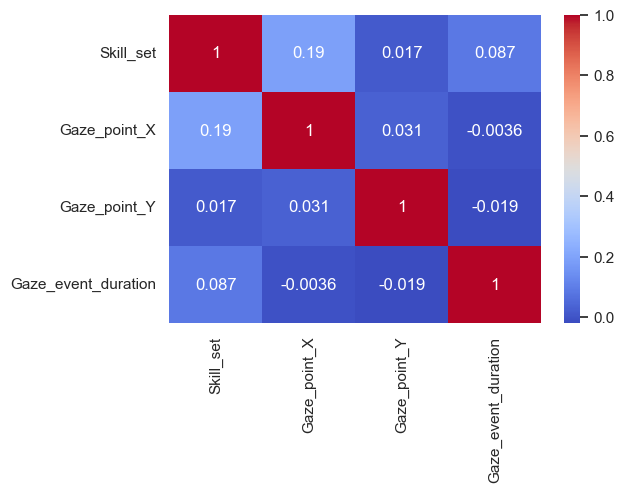

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 6.11 s
Wall time: 6.44 s


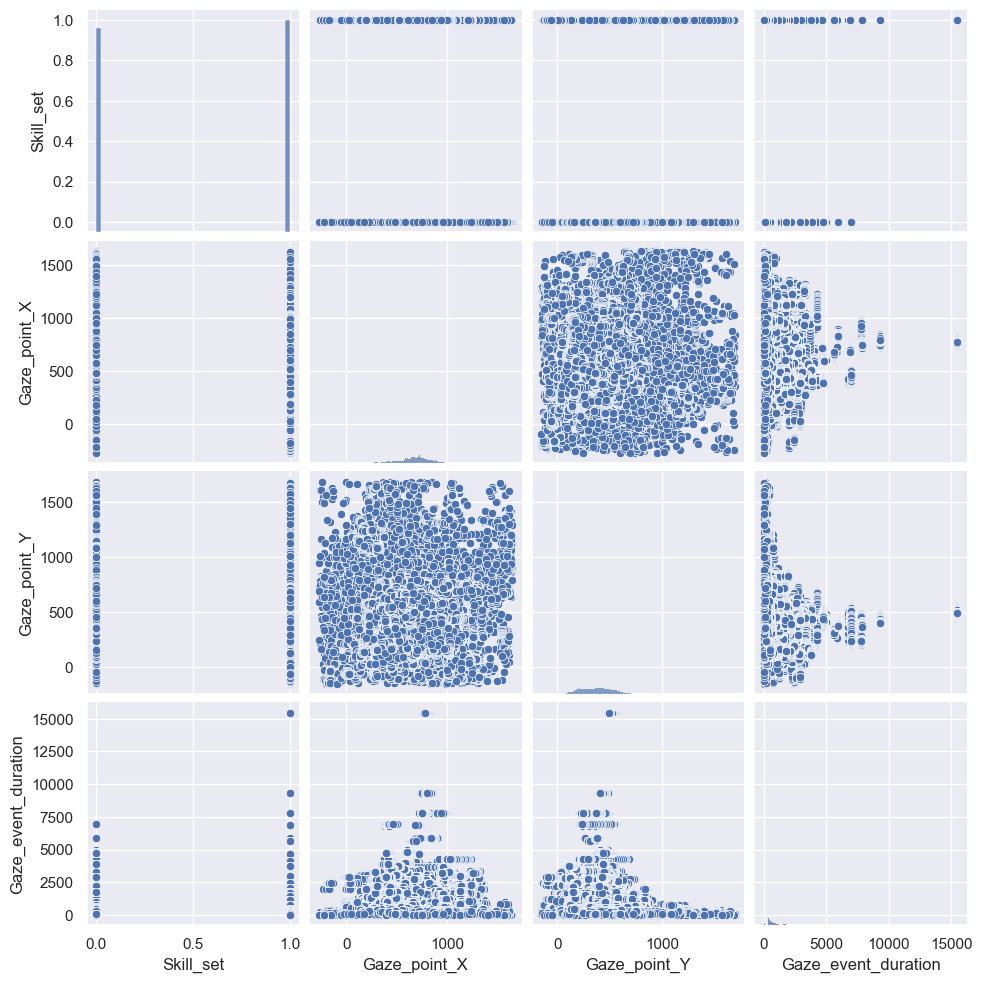

In [26]:
%%time

sns.pairplot(df[['Skill_set', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration' ]])

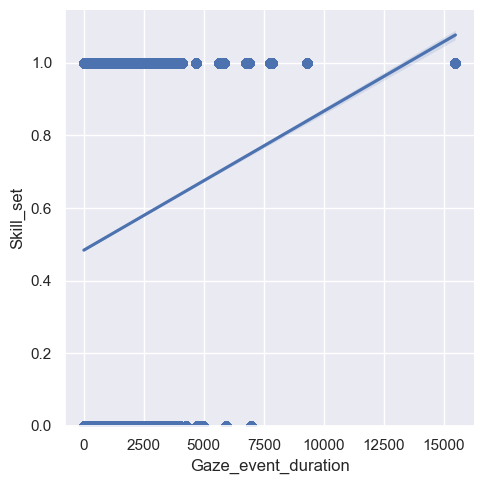

In [28]:
g= sns.lmplot(x='Gaze_event_duration', y='Skill_set', data=df)
g.set(ylim=(0, None))
plt.show()

In [31]:
y = df['Skill_set']
X = df.drop('Skill_set', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [32]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration
208549,898,323,33
436072,280,461,1797
83583,706,407,583
193670,401,209,583
34223,808,462,233


In [33]:
reg_model = LinearRegression()

In [34]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_hat = reg_model.predict(X_test)

In [37]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
256210,0.0,0.521839,-0.521839
245414,0.0,0.638140,-0.638140
64312,1.0,0.543444,0.456556
257064,0.0,0.534899,-0.534899
13221,1.0,0.605251,0.394749


In [38]:
reg_model.coef_

array([5.16100645e-04, 3.44020882e-05, 3.83499432e-05])

In [39]:
reg_model.intercept_

0.12436913172330033

In [41]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,0.0005
1,Gaze_point_Y,0.0000
2,Gaze_event_duration,0.0000


In [42]:
reg_model.score(X_train, y_train)

0.04410670240057246

In [43]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.044
Test data R-squared: 0.044


In [44]:
X_train.shape

(357941, 3)

In [45]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [46]:
adj_R2(X_train, y_train)

0.044

In [47]:
adj_R2(X_test, y_test)

0.042

In [48]:
df_predictions.head()

,actuals,predictions,resid
256210,0.0,0.521839,-0.521839
245414,0.0,0.638140,-0.638140
64312,1.0,0.543444,0.456556
257064,0.0,0.534899,-0.534899
13221,1.0,0.605251,0.394749


In [49]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.239

In [51]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.489

In [52]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [53]:
sorted(sklearn.metrics.SCORERS.keys())

AttributeError: module 'sklearn.metrics' has no attribute 'SCORERS'

In [54]:
my_estimator = LinearRegression()

In [56]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [57]:
R2

array([0.04311869, 0.04526439, 0.04296188, 0.04471672, 0.04420478])

In [58]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.044

In [59]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [61]:
MSE = -NMSE
MSE

array([0.23911795, 0.23864701, 0.23914504, 0.2386418 , 0.23889136])

In [62]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.239

In [63]:
RMSE = np.sqrt(MSE)
RMSE

array([0.48899688, 0.48851511, 0.48902458, 0.48850977, 0.48876513])

In [64]:
RMSE_CV = np.mean(RMSE)
np.round(RMSE_CV,3)

0.489